<h1><center> Introduction to Natural Language Processing </center></h1>


<font color='red'> <h2> What is NLP? </h2> </font> 
* One of the most challenging and revolutionary things artificial intelligence (AI) can do is speak, write, listen, and understand human language. Natural language processing (NLP) is a form of AI that extracts meaning from human language to make decisions based on the information.  
<br>
* It is an interdisciplinary field which draws on other areas of study sucj as computer science , Artificial Intelligence, linguistics and logic.

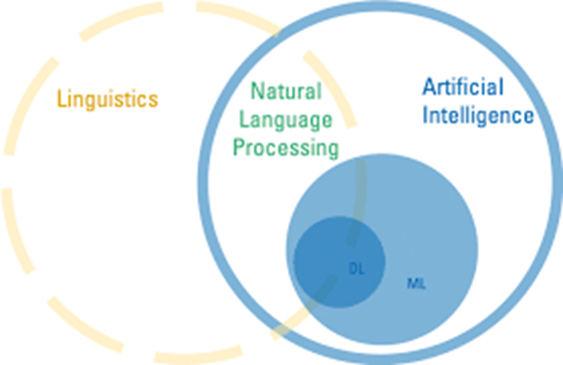

<font color='red'> <h2> Why NLP Understanding is hard? </h2> </font> 
* Natural language is extremely rich in form and structure, and very ambiguous.
    - How to represent meaning
    - Which structures map to which meaning structures.  
<br>
* One input can mean many different things. Ambiguity can be at different levels.
    - Lexical (word level) ambiguity  -- different meanings of words
    - Syntactic ambiguity  --  different ways to parse the sentence
    - Interpreting partial information  --  how to interpret pronouns
    - Contextual information  --  context of the sentence may affect the meaning of that sentence.  
<br>
* Many input can mean the same thing.  
<br>
* Interaction among components of the input is not clear. 
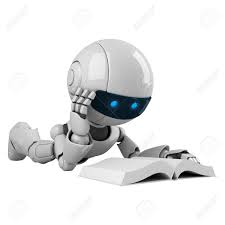

**What Applications of NLP can you think of?**

<font color='red'> <h2> NLP Applications </h2> </font> 
<img src="images/machine_translation.png">
* Famous application: **Google Translate**
<img src="images/Picture1.png">
* Movie Reviews: **Positive of Negative**
<img src="images/Picture2.png">
* Classification of emails: **Important, Spam, etc**
<img src="images/Picture3.png">
<font> <h3> Speech recognition (Speech-to-text) and Speech Understanding </h3> </font> 
<img src="images/speech_recog.jpeg", width=300>
* Famous application: **Amazon’ s Alexa, Google’s Home, SIRI**
<font> <h3> Text prediction </h3> </font> 
<img src="images/text_pred.png", width=300>
* Speed up word processing and Facilitate text dictation (seen in SMS and email)


<font color='red'> <h2>NLP Overview</h2> </font> 

<font color='red'> <h2>NLP Pipeline</h2> </font> 
<font color='black'> <h3>During this class we will work with an example. Write a review of a product of your choice and you will be able to run code examples on your review following the NLP pipeline described below</h3> </font> 
<img src="images/Capture.PNG">

<font color='red'> <h2> Text Pre-processing -  extracting the useful information from the textual data. </h2> </font> 
* Converting all letters to lower or upper case

* Converting numbers into words or removing numbers

* Removing punctuations, accent marks and other diacritics

* Removing white spaces

* Expanding abbreviations

* Removing stop words, sparse terms, and particular words

** Enter a positive or/and a negative review for a product of your choice and use the functins provided in the notebook to pre-process your review. **

In [13]:
import nltk
nltk.data.path.append("data/tokenizers/")
nltk.data.path.append("data/nltk_data/")
!cd data/

In [14]:
import string
from nltk.corpus import stopwords
def convert_to_lower(mytext):
    return mytext.lower()
def remove_numbers(mytext):
    return ''.join([i for i in mytext if not i.isdigit()])
def remove_puntuation(mytext):
    table = str.maketrans('', '', string.punctuation)
    return ' '.join([w.translate(table) for w in mytext.split()])
def remove_white_spaces(mytext):
    return ' '.join(mytext.strip().split())
def remove_stop_words(mytext):
    stop_words = list(stopwords.words('english')) 
    output =[]
    for i in mytext.split():
        if not i in stop_words:
            output.append(i)
    return ' '.join(output)
def pre_process(mytext):
    mytext_lower = convert_to_lower(mytext)
    my_text_char = remove_numbers(mytext_lower)
    my_text_no_punct = remove_puntuation(my_text_char)
    my_text_white_spaces = remove_white_spaces(my_text_no_punct)
    preprocessed_text = remove_stop_words(my_text_white_spaces)
    return preprocessed_text

<font color='red'> <h2> Write a product review below and test our pre-processing functions! </h2> </font> 

In [15]:
# You can play with this. Change the texts between the quotes and call the functions to process/clean it! 
positive_review= "Very entertaining and funny!"
processed_positive_review = pre_process(positive_review)
print(processed_positive_review)

entertaining funny


<font color='red'> <h2>NLP Pipeline</h2> </font> 
<img src="images/Capture2.PNG", width = 1100>

<font color='red'> <h2>How do we have usable meaning in a computer?</h2> </font> 
Definition: meaning (Webster dictionary)
<br/>
• the idea that is represented by a word, phrase, etc.
<br/>
• the idea that a person wants to express by using
words, signs, etc.
<br/>
• the idea that is expressed in a work of writing, art, etc.
<br/>
How do we represent words? Remember, the computer only understands numbers ... 

### Solution 1: Representing words as discrete symbols
** Example: ** Very entertaining and funny!
<br/>
* We define the vocabulary: 
\begin{align}
\mathcal V =\{'entertaining','funny'\}\\
\end{align}
* Embeddings: 
\begin{equation}
  emb =
    \begin{cases}
      X^{entertaining} = [1,0]\\
      X^{funny} = [0,1]\\
    \end{cases}       
\end{equation}
* Vector dimension = number of words in vocabulary (e.g., 500,000)
* This Method is called **<font color='red'>One Hot Encoding**: <br/>
For a corpus 𝐶 with finite vocabulary, 𝑉 and |𝑉|=𝑛.
<br/> Let emb:𝑉→ℕ×ℕ⋯×ℕ≐𝑉 ̃  be a map defined by taking every element in 𝑉 to an 𝑛 component object 𝑋 ⃗∈𝑉 ̃
 such that: <br/>
    \begin{equation}
  X_{i}^{w} =
    \begin{cases}
      1, & \text{if    } idx(w)=i \\
      0,& \text{otherwise}\\
    \end{cases}       
\end{equation}
<br/>



In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

DEF_FIGLEN = 7
DEF_FIGSIZE = (DEF_FIGLEN, DEF_FIGLEN)

def figure(figsize=DEF_FIGSIZE):
    return plt.figure(figsize=figsize)

def new_blank_plot(ax=None, xlim=(-2, 2), ylim=(-2, 2), axis_color='gray', title=''):
    if ax is None:
        ax = plt.gca()
    else:
        plt.sca(ax)
    ax.axis('equal')
    if xlim is not None: ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None: ax.set_ylim(ylim[0], ylim[1])
    if axis_color is not None:
        ax.axhline(color=axis_color)
        ax.axvline(color=axis_color)
    if title is not None:
        ax.set_title(title)
    return ax

def vector(*elems, dim=None):
    """Exercise: What does this function do?"""
    if dim is not None:
        if len(elems) > 0:
            assert dim == len(elems), "Number of supplied elements differs from the requested dimension."
        else: # No supplied elements
            elems = [0.0] * dim
    return tuple(elems)


def draw_vector2d(v, ax=None, origin=(0, 0), width=0.08, color='black', alpha=1.0,
                  **kw_args):
    assert len(v) == 2, "Input vector must be two-dimensional."
    if ax is None:
        ax = plt.gca()
    ax.arrow(origin[0], origin[1], v[0], v[1],
             width=width,
             facecolor=color,
             edgecolor='white',
             alpha=alpha,
             length_includes_head=True,
             **kw_args);
    
def draw_label2d(p, label, coords=False, ax=None, fontsize=14,
                 dp=(0.0, 0.1), horizontalalignment='center', verticalalignment='bottom',
                 **kw_args):
    assert len(p) == 2, "Position must be 2-D."
    if ax is None: ax = plt.gca()
    text = '{}'.format(label)
    if coords:
        text += ' = ({}, {})'.format(p[0], p[1])
    ax.text(p[0]+dp[0], p[1]+dp[1], text,
            fontsize=fontsize,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            **kw_args)

In [17]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def discrete_word_representation(mytext):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(mytext.split())
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    return onehot_encoder.fit_transform(integer_encoded)

In [18]:
one_hot_vec = discrete_word_representation(processed_positive_review)
one_hot_vec

array([[1., 0.],
       [0., 1.]])

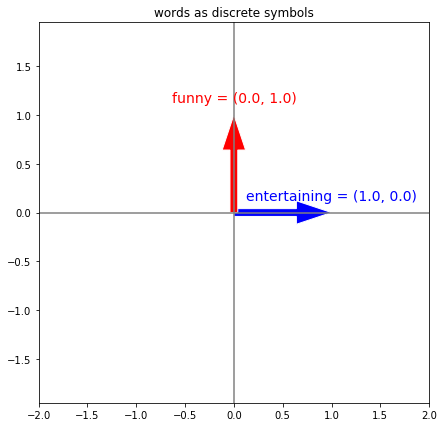

In [19]:
figure()
new_blank_plot(title='words as discrete symbols')
draw_vector2d(one_hot_vec[0], color='blue')
draw_vector2d(one_hot_vec[1], color='red')
draw_label2d(one_hot_vec[0], processed_positive_review.split()[0], color='blue', coords=True)
draw_label2d(one_hot_vec[1], processed_positive_review.split()[1], color='red', coords=True)

** These 2 vectors are <font color='red'>orthogonal** <br/>
** There is no natural notion of <font color='red'> similarity for one-hot vectors!**
<h2>  Learn to encode similarity in the vectors themselves !</h2>

### Solution 2: Representing words by their context
* ** Distributional semantics: A word’s meaning is given by the words that frequently appear close-by **
* When a word w appears in a text, its context is the set of wordsthat appear nearby (within a fixed-size window).
* Use the many contexts of $w$ to build up a representation of $w$
<img src="images/Context_representation.PNG", width=800>


<font color='red'> <h2> Word Vectors/Embeddings</h2> </font> 
* We will build a dense vector for each word, chosen so that it is similar to vectors of words that appear in similar contexts.
<br/>
* **Lower dimensional** -> We consider a word embedding to a D dimensional vector space where D is less than the size of the vocabulary. (in practice it is a linear projection from the embedding space created by one hot encoding and D is no more than 500).
<br/>
* **“Semantic and Syntax”** -> Word vectors will be allowed to be non-orthogonal. In non-mathematical terms we will preserve the semantic similarity of words by using the direction of the word vectors.

<font color='red'> <h2> insert image here </h2> </font>

<font color='red'> <h2> Word2Vec Efficient high dimensional word embeddings </h2> </font> 
Idea:

• We have a large corpus of text 

• Every word in a fixed vocabulary is represented by a vector

• Go through each position t in the text, which has a center word c and context (“outside”) words o

• Use the similarity of the word vectors for c and o to calculate the probability of o given c (or vice versa)

• Keep adjusting the word vectors to maximize this probability

Example	windows	and	process	for	computing $P(w_{t+j}|w_t)$
<img src="images/example_context_rep.png", width=800>

<font color='red'> <h2> Do not run this cell! </h2> </font> 
<font color='red'> <h3> This cell reads the original word2vec embeddings by google. </h3> </font> 

In [8]:
# read all embeddings (300-d vectors) pre-trained
import pandas as pd
EMBEDDING_FILE = "data/GOOG_300d.txt"
embeddings = pd.read_csv(EMBEDDING_FILE,' ',skiprows=1,header=None)
col_names = ['token']
col_names.extend(['v_{}'.format(i) for i in range(300)])
embeddings.columns = col_names
print('Embeddings shape: ', embeddings.shape)
embeddings.head()

Embeddings shape:  (2168995, 301)


,token,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_290,v_291,v_292,v_293,v_294,v_295,v_296,v_297,v_298,v_299
0,</s>,0.001129,-0.000896,0.000319,0.001534,0.001106,-0.001404,-0.000031,-0.000420,-0.000576,...,-0.001549,0.001373,-0.000061,-0.000824,0.001328,0.001160,0.000568,-0.001564,-0.000123,-0.000086
1,in,0.070312,0.086914,0.087891,0.062500,0.069336,-0.108887,-0.081543,-0.154297,0.020752,...,-0.168945,-0.088867,-0.080566,0.064941,0.061279,-0.047363,-0.058838,-0.047607,0.014465,-0.062500
2,for,-0.011780,-0.047363,0.044678,0.063477,-0.018188,-0.063965,-0.001312,-0.072266,0.064453,...,-0.022583,0.003723,-0.082520,0.081543,0.007935,0.000477,0.018433,0.071289,-0.034912,0.024170
3,that,-0.015747,-0.028320,0.083496,0.050293,-0.110352,0.031738,-0.014221,-0.089844,0.117676,...,-0.011292,-0.015625,-0.033447,-0.020630,-0.019409,0.063965,0.020142,0.006866,0.061035,-0.148438
4,is,0.007050,-0.073242,0.171875,0.022583,-0.132812,0.198242,0.112793,-0.107910,0.071777,...,-0.233398,-0.036377,-0.093750,0.182617,0.027100,0.127930,-0.024780,0.011230,0.164062,0.106934


<font color='red'> <h2> Do not run this cell! </h2> </font> 
<font color='red'> <h3> This cell selects the vocabulary embeddings of the amazon reviews dataset.</h3> </font> 

In [ ]:
# Take only embeddings that appear in the corpus of the reviews dataset
data = pd.read_csv('data/amazon_data_10k.csv', index_col=0)
# pre_process the reviews dataset
data['reviews'] = data['reviews'].apply(lambda x: pre_process(x))
data.head()

corpus = set()
data['reviews'].str.split().apply(corpus.update)
print('The vocabuary has {} words.'.format(len(corpus)))

## Get the embeddings of the words in the vocabulary and have embeddings word2vec
embeddings_vocab = pd.DataFrame()
embeddings_vocab['token'] = list(corpus)
embeddings_corpus = pd.merge(embeddings, embeddings_vocab, how='right', on=['token']).dropna()
#embeddings_corpus.to_csv('/var/CMOR/data/u708617/elec/embeddings_vocab.csv')

<font color='red'> <h2> Do not run this cell! </h2> </font> 
<font color='red'> <h2> The cell below uses t-SNE to project the word embeddings from 300 d to 2D </h2> </font> 

In [ ]:
## Project in 2D for visualization purpose
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings.loc[:, 'v_0':])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2168995 samples in 217.899s...


<font color='red'> <h2> Do not run this cell! </h2> </font> 

In [ ]:
tsne_embeddings = pd.DataFrame(columns = ['token','v_1','v_2'])
tsne_embeddings['token'] = embeddings_vocab['token']
tsne_embeddings['v_1'] = tsne_results[:,0]
tsne_embeddings['v_2'] = tsne_results[:,1]
tsne_embeddings.to_csv('/data/tsne_embeddings.csv')

In [20]:
colors=['blue','red','green','yellow','brown','orange']
def visualize_words_w2v(my_list_of_words):
    figure()
    for i in range(len(my_list_of_words)):
        if my_list_of_words[i] in tsne_embeddings['token'].values:
            new_blank_plot(title='words embeddings Word2Vec',xlim=(-3, 3), ylim=(-3, 3))
            draw_vector2d(list(tsne_embeddings[tsne_embeddings['token']==my_list_of_words[i]].values[0][1:]), color=colors[i])
            draw_label2d(list(tsne_embeddings[tsne_embeddings['token']==my_list_of_words[i]].values[0][1:]), my_list_of_words[i], color=colors[i], coords=False)

In [22]:
import pandas as pd
# Read the embeddings of the reviews corpus
embeddings_vocab = pd.read_csv('data/embeddings_vocab.csv', index_col=0)
print('embeddings_vocab size: {}'.format(embeddings_vocab.shape))
embeddings_vocab.head()

embeddings_vocab size: (27989, 301)


,token,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_290,v_291,v_292,v_293,v_294,v_295,v_296,v_297,v_298,v_299
0,said,-0.009094,-0.044189,0.099609,-0.076172,-0.056641,0.061523,0.255859,-0.158203,0.016602,...,-0.193359,0.029907,-0.093262,0.053711,-0.117676,0.069824,0.105957,0.144531,0.180664,-0.086914
1,year,0.061768,0.257812,0.003677,0.145508,-0.037354,-0.120117,0.188477,-0.154297,0.213867,...,-0.031738,0.056396,-0.156250,-0.146484,0.007874,-0.133789,-0.046631,0.111816,0.072754,-0.174805
2,one,0.045654,-0.145508,0.156250,0.166016,0.109863,0.007507,0.073730,-0.031006,0.157227,...,-0.028931,-0.013000,-0.060303,-0.032715,-0.103516,0.044678,-0.095215,-0.015869,0.006714,-0.001884
3,would,0.089355,0.129883,0.212891,0.177734,-0.113281,-0.094727,0.091797,-0.029663,0.027710,...,-0.267578,0.087891,-0.071289,0.130859,0.061768,0.187500,0.039307,-0.152344,0.005524,-0.100586
4,also,0.053467,0.012024,-0.006500,0.008545,0.016479,0.183594,-0.070801,-0.059326,0.014221,...,-0.071777,-0.114258,0.040039,-0.078125,-0.029541,0.074219,0.054932,-0.001938,0.032227,-0.152344


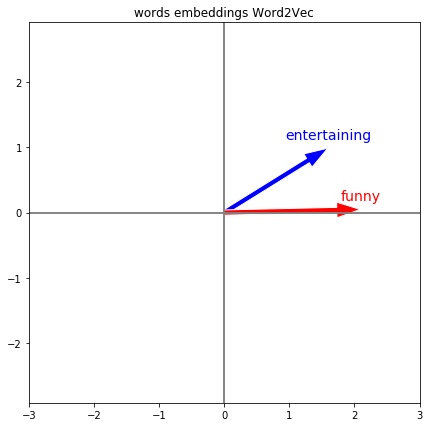

In [24]:
# Load the 2D embeddings 
tsne_embeddings = pd.read_csv('data/tsne_embeddings.csv', index_col=0)
# visualize a list of words 
visualize_words_w2v(processed_positive_review.split())

<font color='red'> <h2> NLP Pipeline </h2> </font> 
<img src="images/nlp_pipeline_3.png", width=1100>

<font color='red'> <h2> Word2Vec Efficient high dimensional word embeddings </h2> </font> 
* Take average of the word2vecs of its words (used in first example SVM)
* Concatenate the word embeddings to form the sentence (used in second example CNN)
* Another approach: Paragraph vector (2014, Quoc Le, Mikolov)
  * Extend word2vec to text level
  * Also two models: add paragraph vector as the input
<img src="images/sentence_embed.png", width=800>

In [25]:
# Read the amazon reviews dataset
data = pd.read_csv('data/amazon_data_10k.csv', index_col=0)
# pre_process the reviews dataset
data['reviews'] = data['reviews'].apply(lambda x: pre_process(x))
data.head()


,reviews,sentiment
0,nothing good say scanner image quality poor sl...,0
1,recieved skin birthday go sansa e excellent fi...,1
2,resolved issues lock pathetically poor gratefu...,0
3,work yes well nearly hoped tiny reviews stated...,0
4,leaving vacation couple days could find batter...,1


In [26]:
### Represent reviews as average of words embeddings

all_review = []
all_unigram = []

for a in data['reviews']:
    unigram = []
    review = []
    unigram = a.split()
    review = [a] * len(unigram)
    all_review.extend(review)
    all_unigram.extend(unigram)


df_unigram = pd.DataFrame({'reviews': all_review, 'token': all_unigram})
df_unigram = pd.merge(data, df_unigram, how='right', on=['reviews'])
df_unigram = df_unigram.drop_duplicates(subset = ['reviews','token'])
df_unigram = pd.merge(embeddings_vocab, df_unigram, how='right', on=['token']).dropna()
df_unigram = df_unigram.groupby(['reviews'],as_index = False).mean()
df_unigram

,reviews,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_291,v_292,v_293,v_294,v_295,v_296,v_297,v_298,v_299,sentiment
0,able adjust see returning,-0.025772,0.157257,-0.144531,0.138062,-0.192871,-0.048706,0.055237,-0.057617,0.078056,...,0.126587,-0.040558,-0.037659,-0.080322,0.028625,0.095215,0.017071,0.132107,-0.121521,0
1,able burn six cds failure rate,0.123006,0.027913,0.044373,0.208903,-0.009644,-0.065979,0.003011,-0.048177,0.126119,...,0.062398,-0.106160,0.027425,-0.084310,0.036051,-0.075643,-0.018814,-0.064189,-0.029114,0
2,able burn whole thing toast pioneer dvrd verif...,0.066411,0.015935,0.033649,0.139526,-0.066444,-0.003199,0.100611,-0.106558,0.051306,...,0.051652,-0.137921,0.049885,-0.026442,0.019259,-0.046023,-0.059559,0.020724,-0.000488,0
3,able collapse small certainly moderately easy ...,0.053085,0.028626,-0.025433,0.097164,-0.119775,0.006975,0.025415,-0.034370,0.111130,...,0.098162,-0.056672,0.011393,-0.019860,0.048861,0.043048,-0.044175,0.025990,0.033907,1
4,able connect mac pc wireless keyboard mouse vi...,0.024727,0.009866,-0.045933,0.111139,-0.089738,0.034531,0.025286,-0.031473,0.104483,...,0.070307,-0.074852,0.026937,0.014610,-0.032774,0.024424,-0.074364,0.001452,0.008260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34792,zune hd didnt workwith old docking station lis...,-0.139160,0.066938,-0.049247,-0.058123,-0.047137,0.014212,-0.059256,-0.023455,0.175886,...,0.154576,-0.075631,0.147339,0.125083,-0.013323,-0.136326,-0.092215,-0.023908,0.023525,0
34793,zune mp player great car packed big rip dollar...,0.054129,-0.008754,-0.023944,0.094769,-0.090864,0.003104,0.054158,-0.019110,0.138644,...,0.092615,-0.086169,0.033205,-0.031981,-0.012948,-0.028467,-0.075935,0.014572,-0.021138,0
34794,zune must sound great small unit plug power pl...,0.020793,0.068935,0.006104,0.027381,-0.089518,-0.049292,0.081873,-0.107031,0.126619,...,0.092957,-0.111749,-0.031160,-0.049593,-0.033134,-0.023336,-0.040609,-0.079118,-0.013694,1
34795,zune vs ipod ipod wins ipod gb evertying need ...,-0.039280,0.017532,0.035322,0.112244,-0.003090,0.071924,-0.004925,-0.054319,0.054321,...,0.077744,-0.079247,-0.005413,-0.002078,-0.023064,-0.034286,-0.085489,-0.062325,0.050823,1


<font color='red'> <h2> Simple Classifier – From word representation to modeling </h2> </font> 
**Linear SVM and Logistic Based Classification**
* Pre-processing converts words to features and creates new features based on word count
* Text vectorization  outputs  the features to numerical vectors. Ex count vectors, TF-IDF vectors
* For classification problems, vector spaced based ML methods can be applied to find decision boundary between two classes .  Notable example SVM.
* Linear SVM defines the criterion that maximally separates the two classes, allowing users to adjust cost and penalty parameters on misclassification to suit business problems.
<img src="images/SVM_hyperplane.png", width=400>

In [27]:
### Split the dataset to train and test (80% for training and 20% for testing)

## Fit the linear SVC on the training data

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

Train_X, Test_X, Train_Y, Test_Y = train_test_split(df_unigram[df_unigram.columns[1:301]],df_unigram['sentiment'],test_size=0.2)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(Train_X, Train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [28]:
# Test the Linar SVC model on the test data
# WE use the accuracy defined as ratio of correctly predicted data by the overall data
from sklearn.metrics import accuracy_score

Test_predictions = clf.predict(Test_X)
print("The model predicted {0:.2f}% correctly from the test dataset ".format(accuracy_score(Test_Y,Test_predictions)*100))


The model predicted 82.97% correctly from the test dataset 


<font color='red'> <h2> Cassify the sentiment of your own review using the linear SVC model! </h2> </font> 
The linear SVM is able to correctly classify **83.29%** of the amazon test dataset reviews.
<br/>
You can use the function below to find out what the model thinks of your review!!

1) Write your review

2) Preprocess your review

3) Call the function get_svc_class(my_processed_review) to ge the result of the SVM model! 

In [29]:
# Classify the sentiment of my comment
import numpy as np
def get_svc_class(my_processed_review):
    avg_embed = []
    for i in my_processed_review.split():
        if i in embeddings_vocab['token'].values:
            avg_embed.append(embeddings_vocab[embeddings_vocab['token']=='happy'].values[0][1:])
    my_prediction = clf.predict(np.mean(avg_embed,axis=0).reshape(1, -1))
    if my_prediction == 1:
        print('The model predicted that the review is positive')
    else:
        print('The model predicted that the review is negative')

In [30]:
get_svc_class(processed_positive_review)

The model predicted that the review is positive


<font color='red'> <h2> Neural Network classifier- Convolution neural networks</h2> </font> 
* Traditionally, CNNs are used to analyze images and are made up of one or more convolutional layers.

* Main idea here is to use multiple filters of different sizes that can look at bi-grams, tri-grams, n-grams.

* Fast to train, works well, but fails to capture longer dependencies.

<img src="images/CNN.png", width=700>

In [31]:
import os
import sys
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

/apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
# make the max word length to be constant
MAX_WORDS = embeddings_vocab.shape[0]
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 300
filter_sizes = [1,2,3]
num_filters = 20
drop = 0.3
batch_size = 64
epochs = 20

In [33]:
tokenizer  = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(data['reviews'])
sequences =  tokenizer.texts_to_sequences(data['reviews'])
word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))
data_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

## Split data to train, validation and test
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data_padded, data['sentiment'],test_size=0.2)
Train_X, Val_X, Train_Y, Val_Y = train_test_split(Train_X, Train_Y,test_size=0.2)

unique words : 81816


In [34]:
## Create embeddings Matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in embeddings_vocab['token'].values:
        embedding_matrix[i] = embeddings_vocab[embeddings_vocab['token']==word].values[0][1:]

In [35]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

W0428 18:48:49.692382 140403222415168 deprecation_wrapper.py:119] From /apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [36]:
inputs = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding = embedding_layer(inputs)
print(embedding.shape)
reshape = Reshape((MAX_SEQUENCE_LENGTH,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
maxpool_0 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)
concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(1,activation = 'sigmoid')(dropout)
# this creates a model that includes
model = Model(inputs=inputs, outputs=output)
checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
model.compile(optimizer=Adam(lr = 1e-2), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

W0428 18:48:54.183534 140403222415168 deprecation_wrapper.py:119] From /apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0428 18:48:54.232224 140403222415168 deprecation_wrapper.py:119] From /apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0428 18:48:54.246148 140403222415168 deprecation_wrapper.py:119] From /apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0428 18:48:54.246721 140403222415168 deprecation_wrapper.py:119] From /apps/cmor/dsai_local/anaconda/envs/DSAI02-NLP-DevEnv01/lib/python3.6/sit

(?, 200, 300)
(?, 200, 300, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     24545100    input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 200, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 1, 20)   6020        reshape_1[0][0]                  
______________________________________________________________________________

In [37]:
history = model.fit(Train_X, Train_Y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(Val_X, Val_Y))

Train on 22400 samples, validate on 5600 samples
Epoch 1/20
22400/22400 [==============================] - 5s 224us/step - loss: 0.4016 - acc: 0.8163 - val_loss: 0.3182 - val_acc: 0.8614

Epoch 00001: val_acc improved from -inf to 0.86143, saving model to weights_cnn_sentece.hdf5
Epoch 2/20
22400/22400 [==============================] - 5s 205us/step - loss: 0.3271 - acc: 0.8592 - val_loss: 0.3049 - val_acc: 0.8716

Epoch 00002: val_acc improved from 0.86143 to 0.87161, saving model to weights_cnn_sentece.hdf5
Epoch 3/20
22400/22400 [==============================] - 5s 206us/step - loss: 0.2937 - acc: 0.8751 - val_loss: 0.3131 - val_acc: 0.8661

Epoch 00003: val_acc did not improve from 0.87161
Epoch 4/20
22400/22400 [==============================] - 4s 199us/step - loss: 0.2716 - acc: 0.8888 - val_loss: 0.3175 - val_acc: 0.8648

Epoch 00004: val_acc did not improve from 0.87161
Epoch 5/20
22400/22400 [==============================] - 4s 198us/step - loss: 0.2535 - acc: 0.8958 - val

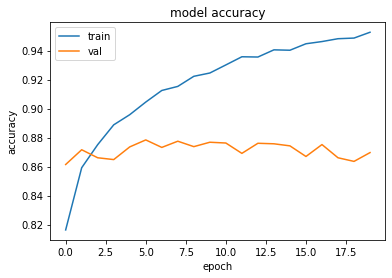

In [38]:
model = load_model('weights_cnn_sentece.hdf5')

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [39]:
print("The model predicted {0:.2f}% correctly from the test dataset ".format(accuracy_score(Test_Y, (model.predict(Test_X) > 0.5).astype(int))*100))

The model predicted 86.93% correctly from the test dataset 
